# Answer 1 - Blurry Moments

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
IMG_PATH = '../imgs/' 

In [2]:
# loading images
Jam = cv2.imread(IMG_PATH+'Jam.jpg')
Jam = cv2.cvtColor(Jam,cv2.COLOR_BGR2GRAY)
webb = cv2.imread(IMG_PATH+'webb.jpg')
webb = cv2.cvtColor(webb,cv2.COLOR_BGR2GRAY)
# plt.imshow(webb, cmap="gray")

## 1.1

In [3]:
def gaussKernelGenerator(k,sigma):
    gaussian = np.zeros((k,k))
    k2=(np.floor(k/2)).astype(int)
    for x in range(-k2,k2+1):
        for y in range(-k2,k2+1):
            gaussian[x+k2,y+k2]=np.exp(-(x**2+y**2)/(2*sigma**2))/sigma*(2*np.pi)**2
    # normalization
    gaussian = gaussian - gaussian.min()
    sum = gaussian.sum()
    gaussian = gaussian/sum
    return gaussian

In [4]:
def gaussianFilter(img,sigma,k):
    kernel = gaussKernelGenerator(k,sigma)
    row,col = img.shape
    padded = np.zeros((row+k-1,col+k-1))
    k=(np.floor(k/2)).astype(int)
    out = np.copy(img)
    padded[k:padded.shape[0]-k,k:padded.shape[1]-k]=img
    for i in range(k, padded.shape[0]-k):
        for j in range(k,padded.shape[1]-k):
            temp=padded[i-k:i+k+1,j-k:j+k+1]
            sum=temp*kernel
            out[i-k,j-k]=sum.sum()
    # Thresholding
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            if out[x][y] > 255:
                out[x][y] = 255
            if out[x][y] < 0:
                out[x][y] = 0
    out = out.astype(int)
    return out

In [5]:
def unsharp_masking(img,k):
    sigma = 5
    img2 = gaussianFilter(img,sigma,k)
    img_mask = img - img2
    scale = 1
    out = img + scale*img_mask
    out = np.rint(out)
    # Thresholding
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            if out[x][y] > 255:
                out[x][y] = 255
            if out[x][y] < 0:
                out[x][y] = 0
    out = out.astype(int)
    return out

In [6]:
def highboost_filtering(img,k):
    sigma = 5
    img2 = gaussianFilter(img,sigma,k)
    img_mask = img - img2
    scale = 2
    out = img + scale*img_mask
    out = np.rint(out)
    # Thresholding
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            if out[x][y] > 255:
                out[x][y] = 255
            if out[x][y] < 0:
                out[x][y] = 0
    out = out.astype(int)
    return out

Text(0.5, 0.98, 'Highboost Filtering')

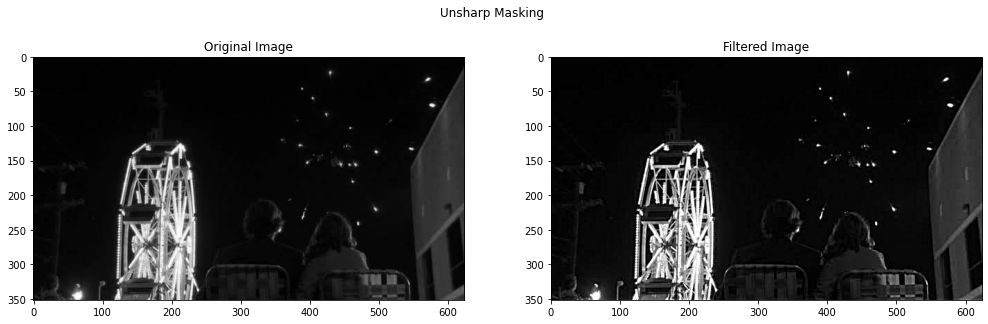

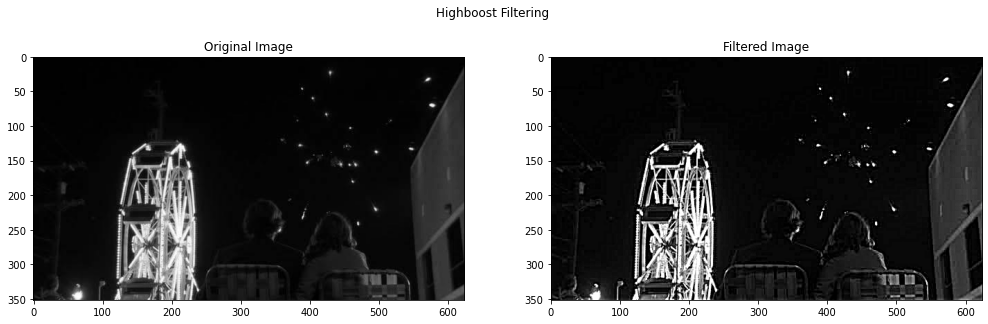

In [7]:
ret1 = unsharp_masking(Jam,9)
ret2 = highboost_filtering(Jam,9)
fig = plt.figure(figsize=[17,5])
plt.subplot(1,2,1).set_title("Original Image")
plt.imshow(Jam,cmap="gray")
plt.subplot(1,2,2).set_title("Filtered Image")
plt.imshow(ret1,cmap="gray")
plt.suptitle("Unsharp Masking")
fig = plt.figure(figsize=[17,5])
plt.subplot(1,2,1).set_title("Original Image")
plt.imshow(Jam,cmap="gray")
plt.subplot(1,2,2).set_title("Filtered Image")
plt.imshow(ret2,cmap="gray")
plt.suptitle("Highboost Filtering")

## 1.2

Choosing filter sizes 5,7,9

Text(0.5, 0.98, 'Highboost Filtering')

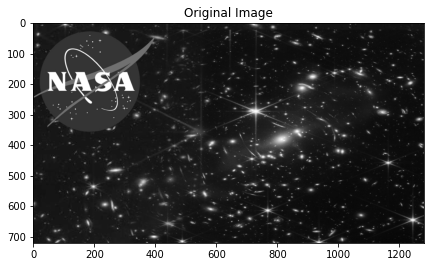

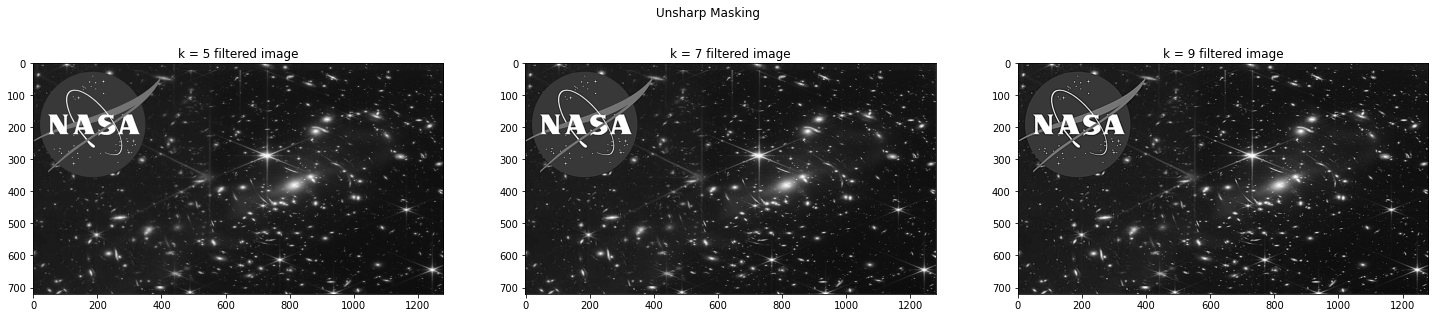

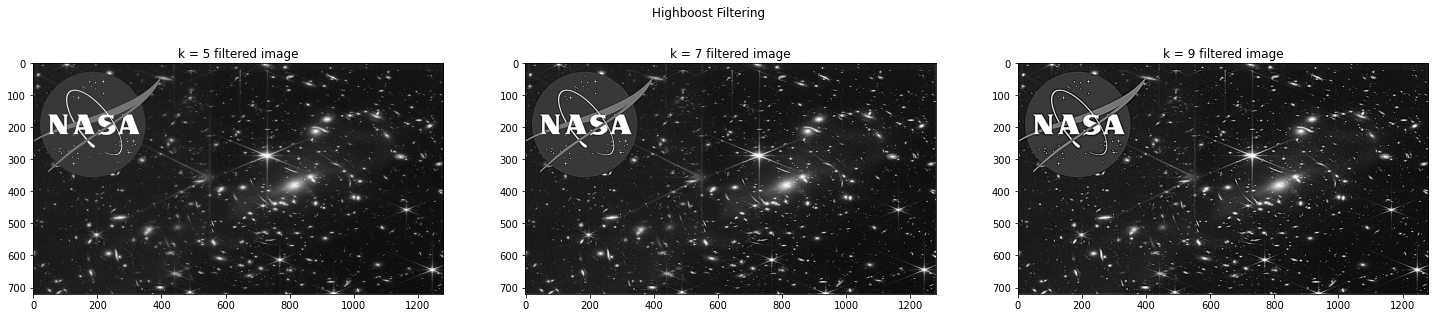

In [8]:
unsh1 = unsharp_masking(webb,5)
unsh2 = unsharp_masking(webb,7)
unsh3 = unsharp_masking(webb,9)
high1 = highboost_filtering(webb,5)
high2 = highboost_filtering(webb,7)
high3 = highboost_filtering(webb,9)
fig = plt.figure(figsize=[7,7])
plt.imshow(webb,cmap="gray")
plt.title("Original Image")
fig = plt.figure(figsize=[25,5])
plt.subplot(1,3,1).set_title("k = 5 filtered image")
plt.imshow(unsh1,cmap="gray")
plt.subplot(1,3,2).set_title("k = 7 filtered image")
plt.imshow(unsh2,cmap="gray")
plt.subplot(1,3,3).set_title("k = 9 filtered image")
plt.imshow(unsh3,cmap="gray")
plt.suptitle("Unsharp Masking")
fig = plt.figure(figsize=[25,5])
plt.subplot(1,3,1).set_title("k = 5 filtered image")
plt.imshow(high1,cmap="gray")
plt.subplot(1,3,2).set_title("k = 7 filtered image")
plt.imshow(high2,cmap="gray")
plt.subplot(1,3,3).set_title("k = 9 filtered image")
plt.imshow(high3,cmap="gray")
plt.suptitle("Highboost Filtering")

Observations:<br>
The lines in outputs of highboost filters are sharper than the outputs of unsharp masking.<br>

# Answer 2 - Intentional Blurry Moments

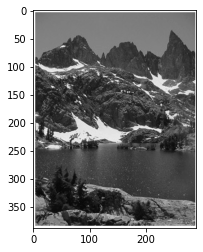

In [9]:
# loading images
lakeside = cv2.imread(IMG_PATH+'lakeside.jpg')
lakeside = cv2.cvtColor(lakeside,cv2.COLOR_BGR2GRAY)
plt.imshow(lakeside,cmap="gray")

In [10]:
def bilateral_Filter(img,diam,sigma_spatial,sigma_range):
    kernel_spatial = gaussKernelGenerator(diam,sigma_spatial)
    row,col = img.shape
    rad = diam//2
    # Padding
    padded = np.zeros((row+2*rad,col+2*rad))
    out = np.copy(img)
    padded[rad:padded.shape[0]-rad,rad:padded.shape[1]-rad]=img

    for i in range(rad, padded.shape[0]-rad):
        for j in range(rad,padded.shape[1]-rad):
            temp=padded[i-rad:i+rad+1,j-rad:j+rad+1]
            temp2 = -(temp - padded[i][j])**2            # square of intensities
            kernel_range = np.exp(temp2/(2*(sigma_range**2)))
            prod = kernel_spatial*kernel_range
            sum = np.sum(prod)
            out[i-rad][j-rad] = np.sum(temp*prod)/sum
            
    out = np.rint(out)
    # Thresholding
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            if out[x][y] > 255:
                out[x][y] = 255
            if out[x][y] < 0:
                out[x][y] = 0
    out = out.astype(int)
    return out

Text(0.5, 1.0, 'bilateral filtered image')

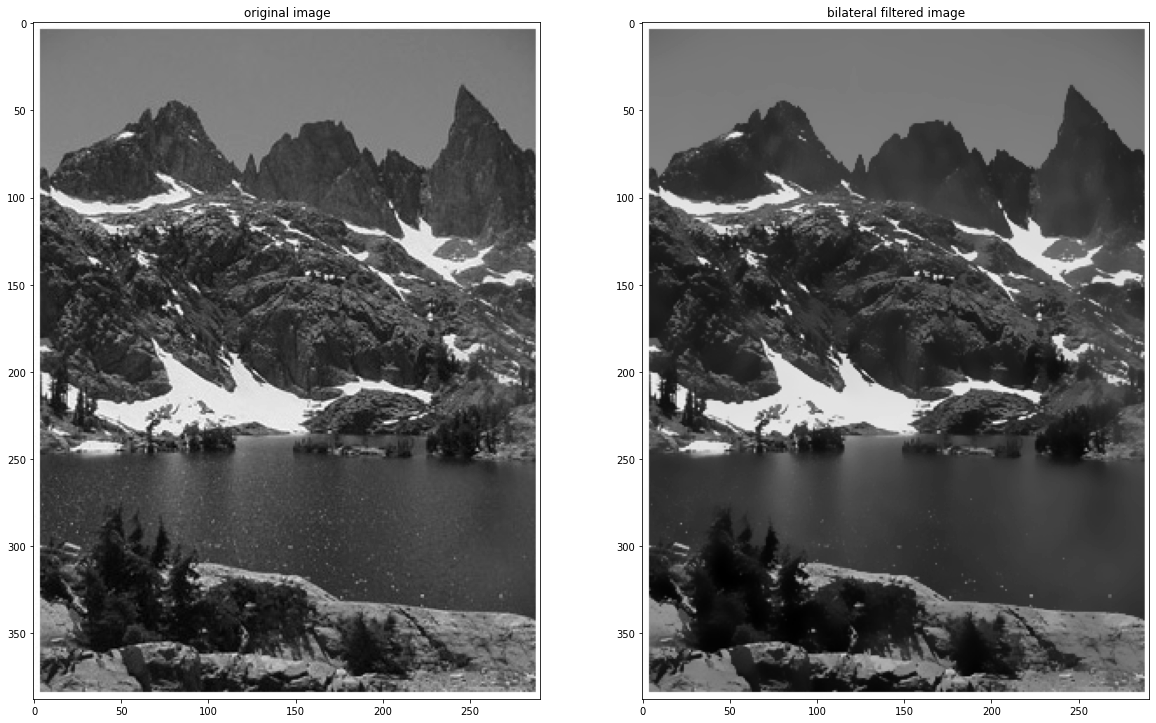

In [11]:
filtered = bilateral_Filter(lakeside,11,19,19)
fig = plt.figure(figsize=[20,20])
plt.subplot(1,2,1)
plt.imshow(lakeside,cmap="gray")
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(filtered,cmap="gray")
plt.title("bilateral filtered image")

Text(0.5, 1.0, 'sigma_spatial = 3, sigma_range = 3')

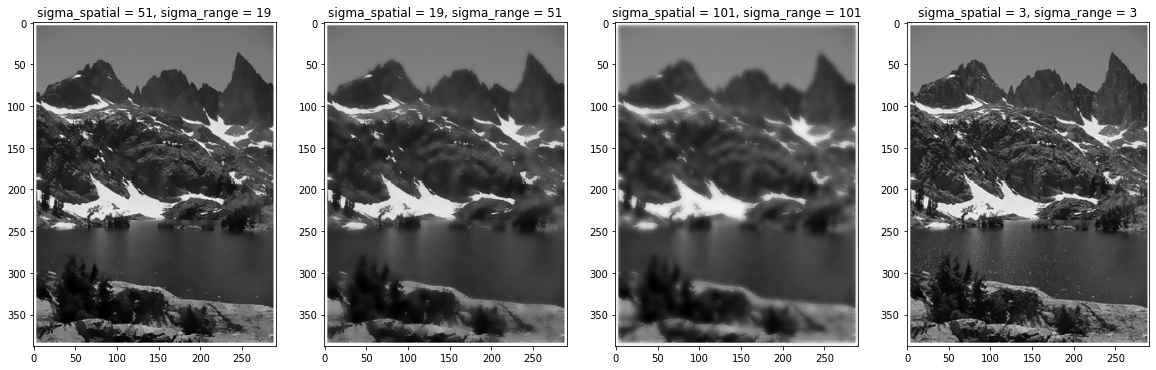

In [12]:
# different combinations of domain and range parameters

filtered = bilateral_Filter(lakeside,11,51,19)
fig = plt.figure(figsize=[20,20])
plt.subplot(1,4,1)
plt.imshow(filtered,cmap="gray")
plt.title("sigma_spatial = 51, sigma_range = 19")

filtered = bilateral_Filter(lakeside,11,19,51)
plt.subplot(1,4,2)
plt.imshow(filtered,cmap="gray")
plt.title("sigma_spatial = 19, sigma_range = 51")

filtered = bilateral_Filter(lakeside,11,101,101)
plt.subplot(1,4,3)
plt.imshow(filtered,cmap="gray")
plt.title("sigma_spatial = 101, sigma_range = 101")

filtered = bilateral_Filter(lakeside,11,3,3)
plt.subplot(1,4,4)
plt.imshow(filtered,cmap="gray")
plt.title("sigma_spatial = 3, sigma_range = 3")

The bilateral filter gradually approximates Gaussian convolution more closely as the range parameter expands and flattens, i.e., is virtually constant throughout the image's intensity interval.

# Answer 3 - Pam and Graphic Design
## 3.1

Text(0.5, 1.0, 'bilateral filtered image')

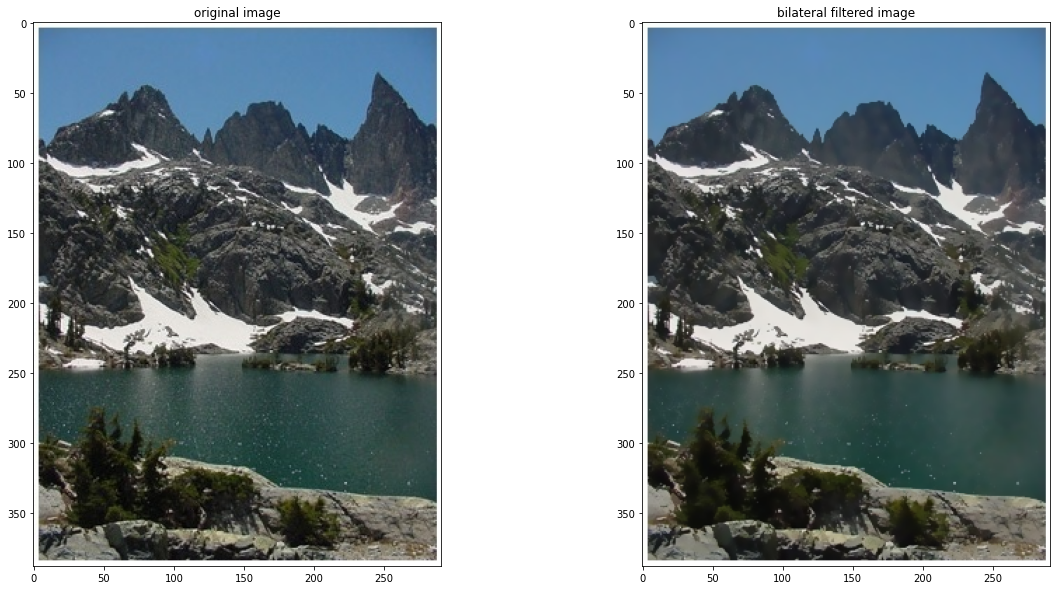

In [13]:
# load image
lakeside = cv2.imread(IMG_PATH+'lakeside.jpg')
lakeside = cv2.cvtColor(lakeside,cv2.COLOR_BGR2RGB)
# plt.imshow(lakeside)
# Split into 3 channels R,G,B
(r,g,b) = cv2.split(lakeside)
# Apply bilateral filter
r_new = bilateral_Filter(r,7,195,15)
g_new = bilateral_Filter(g,7,195,15)
b_new = bilateral_Filter(b,7,195,15)
new = cv2.merge([r_new,g_new,b_new])
fig = plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(lakeside)
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(new)
plt.title("bilateral filtered image")

## 3.2

In [14]:
lakeside_copy = cv2.cvtColor(lakeside,cv2.COLOR_BGR2GRAY)

## 3.3

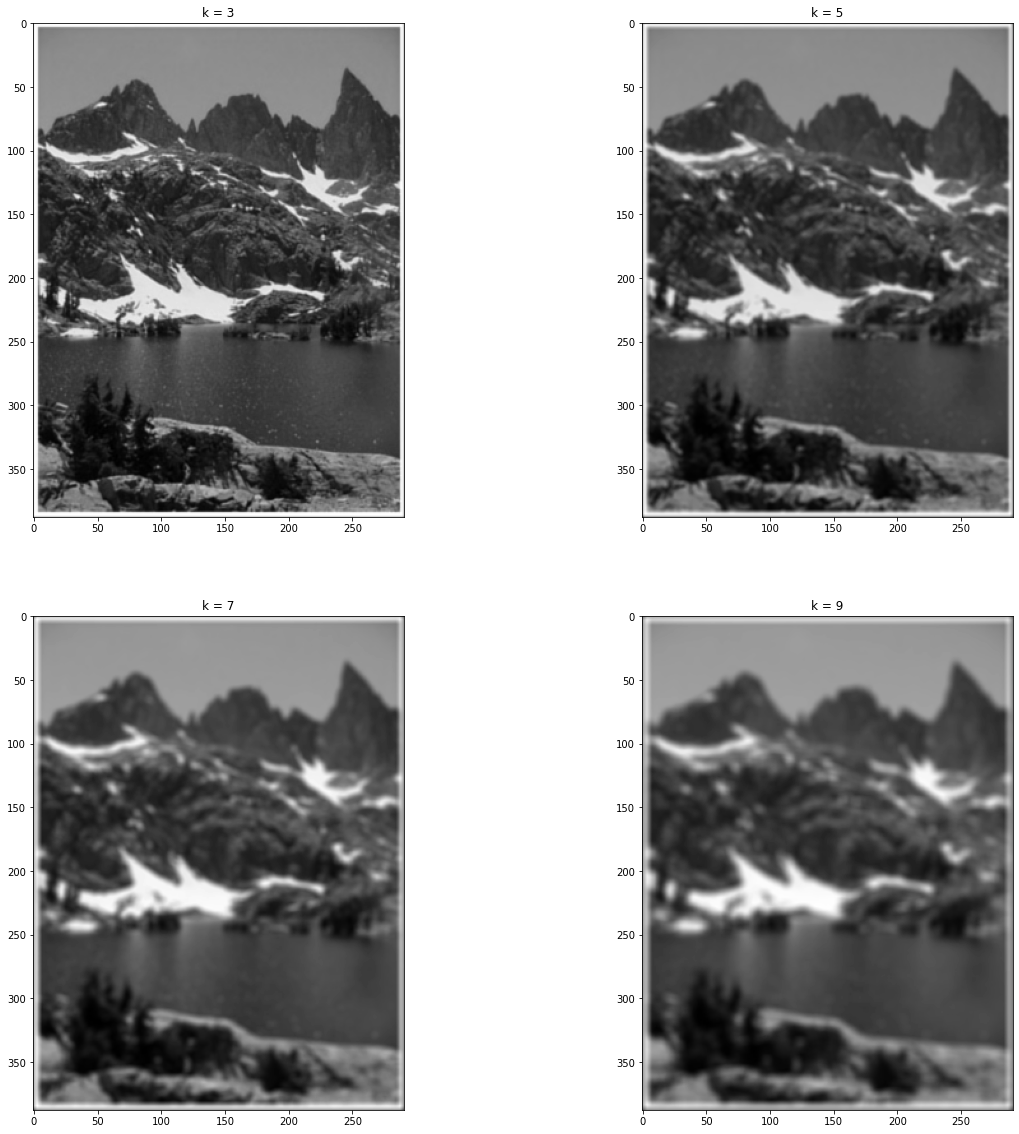

In [15]:
lakesideblur1 = gaussianFilter(lakeside_copy,21,3)
lakesideblur2 = gaussianFilter(lakeside_copy,21,5)
lakesideblur3 = gaussianFilter(lakeside_copy,21,7)
lakesideblur4 = gaussianFilter(lakeside_copy,21,9)
fig = plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(lakesideblur1,cmap="gray")
plt.title("k = 3")
plt.subplot(2,2,2)
plt.imshow(lakesideblur2,cmap="gray")
plt.title("k = 5")
plt.subplot(2,2,3)
plt.imshow(lakesideblur3,cmap="gray")
plt.title("k = 7")
plt.subplot(2,2,4)
plt.imshow(lakesideblur4,cmap="gray")
plt.title("k = 9")

blur = lakesideblur2.astype(np.uint8)

The image blurred with gaussian of kernel size 5 looks most appropriate

## 3.4

In [16]:
def Adaptive_thresh(img,thresh,k):
    row,col = img.shape
    padded = np.zeros((row+k-1,col+k-1))
    k=(np.floor(k/2)).astype(int)
    out = np.copy(img)
    padded[k:padded.shape[0]-k,k:padded.shape[1]-k]=img
    mean = np.copy(blur)
    T = np.zeros(blur.shape)
    padded[k:padded.shape[0]-k,k:padded.shape[1]-k]=blur
    out = np.copy(blur)
    for i in range(k, padded.shape[0]-k):
            for j in range(k,padded.shape[1]-k):
                temp=padded[i-k:i+k+1,j-k:j+k+1]
                mean[i-k,j-k]=np.mean(temp)
                T[i-k,j-k] = mean[i-k,j-k] - thresh
                out[i-k,j-k] = np.where(out[i-k,j-k] > T[i-k,j-k], 255, 0)
    out = out.astype(int)
    return out

Text(0.5, 1.0, 'edge mask')

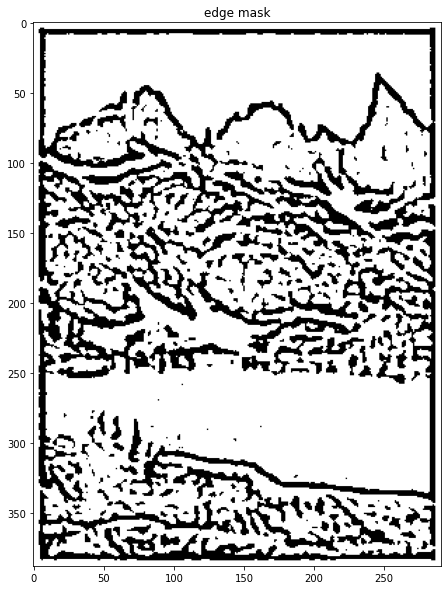

In [17]:
mask = Adaptive_thresh(blur,5,9)
fig = plt.figure(figsize=[10,10])
plt.imshow(mask,cmap="gray")
plt.title("edge mask")

## 3.5

Text(0.5, 1.0, 'Cartoon image')

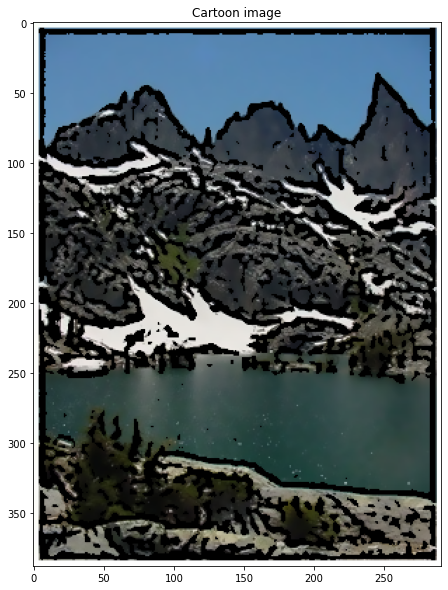

In [18]:
r_new = np.bitwise_and(r_new,mask)
g_new = np.bitwise_and(g_new,mask)
b_new = np.bitwise_and(b_new,mask)
cartoon = cv2.merge([r_new,g_new,b_new])
fig = plt.figure(figsize=[10,10])
plt.imshow(cartoon)
plt.title("Cartoon image")

# Answer 4
## 4.1

In [19]:
def twoD_DFT(img):
    M,N = img.shape
    out = np.zeros((M,N), dtype=complex)
    for k in range(M):
        for l in range(N):
            for m in range(M):
                for n in range(N):
                    out[k][l] += img[m][n]*np.exp(-2j*np.pi*(k*m/M+l*n/N))
    return out

## 4.2

In [20]:
def oneD_FFT(arr):
        #assuming input arr is pow of 2
    if len(arr) != 1:
        even = oneD_FFT(arr[::2])
        odd = oneD_FFT(arr[1::2])
        # finding omega
        w = np.exp(-2j*np.pi*np.arange(len(arr))/len(arr))
        out = np.concatenate([even+w[:int(len(arr)/2)]*odd,even+w[int(len(arr)/2):]*odd])
        return out
    else:
        return arr

In [21]:
def twoD_FFT(img):
    row,col = img.shape
    temp = np.apply_along_axis(oneD_FFT, 0, img)
    out = np.apply_along_axis(oneD_FFT, 1, temp)
    return out

## 4.3

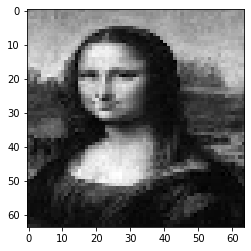

In [22]:
# load image
leaf = cv2.imread(IMG_PATH+'leaf.jfif')
leaf = cv2.cvtColor(leaf,cv2.COLOR_BGR2GRAY)
leaf = cv2.resize(leaf,[64,64])
gray = cv2.imread(IMG_PATH+'gray.jfif')
gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,[64,64])
plt.imshow(gray,cmap="gray")

Text(0.5, 1.0, '2D-FFT')

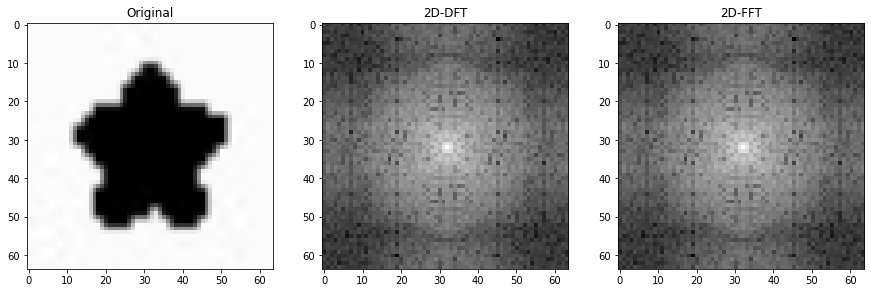

In [23]:
test1 = twoD_DFT(leaf)
test2 = twoD_FFT(leaf)

# Plotting
fig = plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.imshow(leaf,cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(20*np.log10(abs(np.fft.fftshift(test1))),cmap="gray")
plt.title("2D-DFT")
plt.subplot(1,3,3)
plt.imshow(20*np.log10(abs(np.fft.fftshift(test2))),cmap="gray")
plt.title("2D-FFT")

### Time comparision of DFT and FFT

In [24]:
import timeit
leaf2 = cv2.resize(leaf,[32,32])
leaf3 = cv2.resize(leaf,[16,16])
leaf4 = cv2.resize(leaf,[8,8])
t_dft = np.zeros(4)
t_fft = np.zeros(4)

start = timeit.default_timer()
temp = twoD_DFT(leaf4)
stop = timeit.default_timer()
t_dft[0] = stop - start
# print(t_dft[0])

start = timeit.default_timer()
temp = twoD_DFT(leaf3)
stop = timeit.default_timer()
t_dft[1] = stop - start
# print(t_dft[1])

start = timeit.default_timer()
temp = twoD_DFT(leaf2)
stop = timeit.default_timer()
t_dft[2] = stop - start
# print(t_dft[2])

start = timeit.default_timer()
temp = twoD_DFT(leaf)
stop = timeit.default_timer()
t_dft[3] = stop - start
# print(t_dft[3])

start = timeit.default_timer()
temp = twoD_DFT(leaf4)
stop = timeit.default_timer()
t_fft[0] = stop - start
# print(t_fft[0])

start = timeit.default_timer()
temp = twoD_FFT(leaf3)
stop = timeit.default_timer()
t_fft[1] = stop - start
# print(t_fft[1])

start = timeit.default_timer()
temp = twoD_FFT(leaf2)
stop = timeit.default_timer()
t_fft[2] = stop - start
# print(t_fft[2])

start = timeit.default_timer()
temp = twoD_FFT(leaf)
stop = timeit.default_timer()
t_fft[3] = stop - start
# print(t_fft[3])

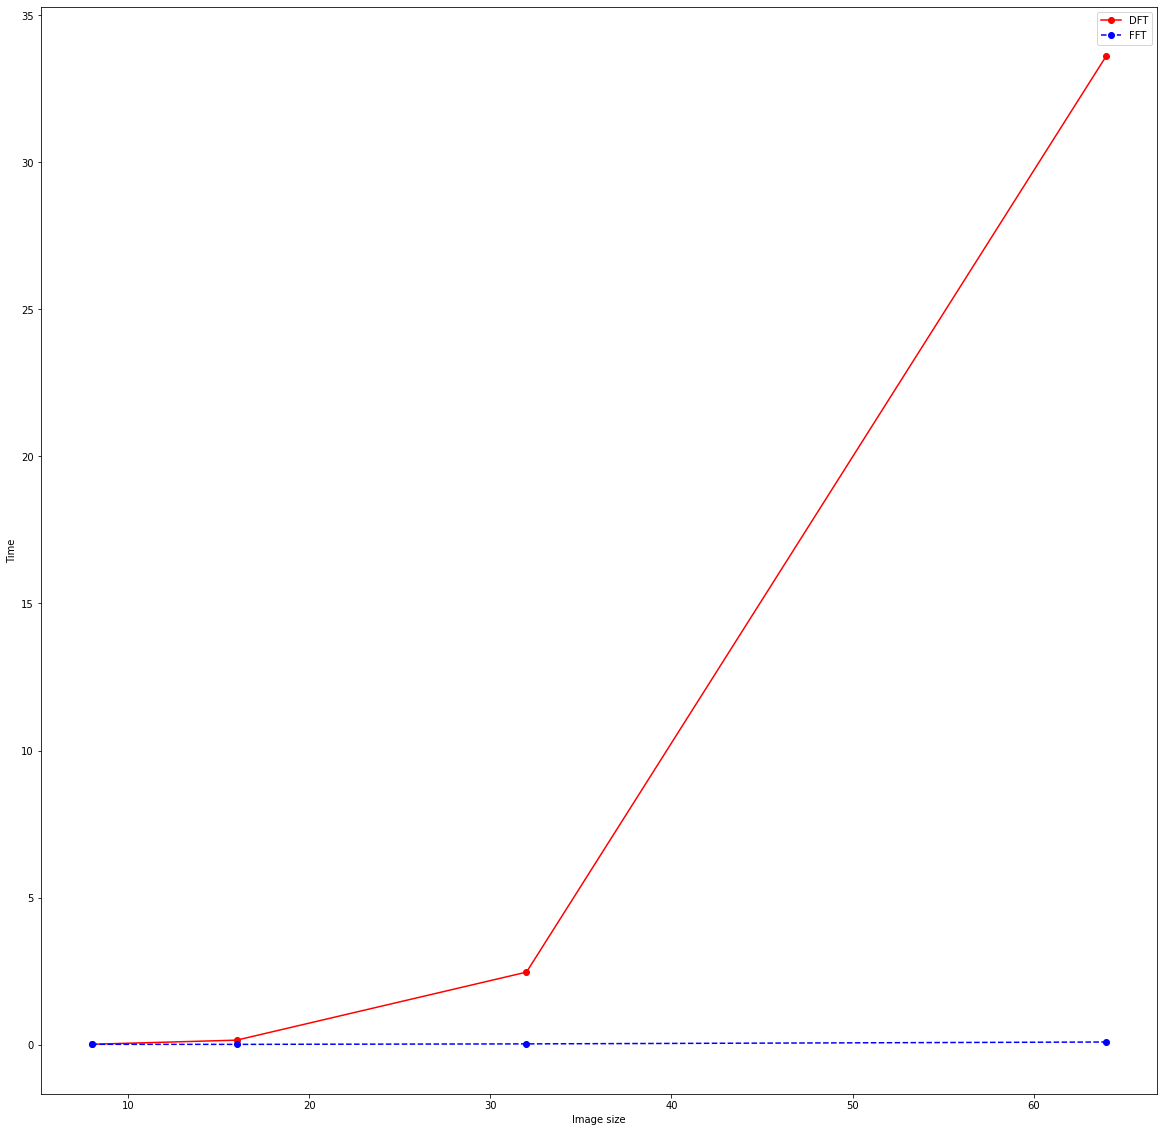

In [25]:
fig = plt.figure(figsize=[20,20])
plt.plot([8, 16, 32, 64], t_dft, 'r', label='DFT', marker='o')
plt.plot([8, 16, 32, 64], t_fft, 'b--', label='FFT', marker='o')
plt.xlabel('Image size')
plt.ylabel('Time')
plt.legend()

## 4.4

In [26]:
def twoD_IFFT(img):
# we can use property that fft of fft gives flipped original image. to fix flipping, x and y coords can be reversed in freq domain before applying fft
    temp = np.flipud(img)
    temp = np.fliplr(temp)
    original = twoD_FFT(temp)
    return original

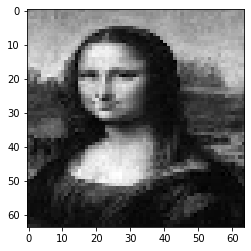

In [27]:
test1 = twoD_FFT(gray)
test2 = abs(twoD_IFFT(test1))
plt.imshow(test2,cmap="gray")

## 4.5

Text(0.5, 1.0, 'FFT of FFT')

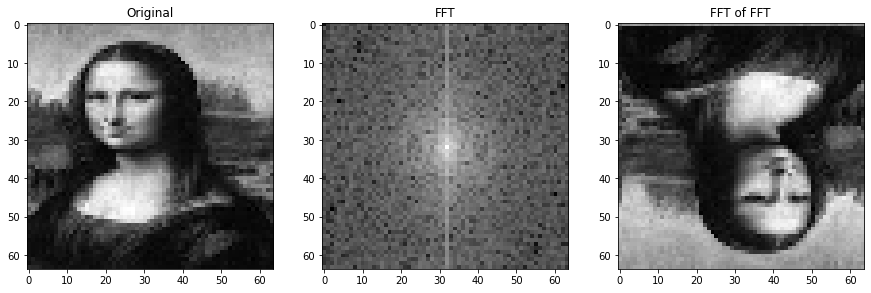

In [28]:
fft1 = twoD_FFT(gray)
fft2 = twoD_FFT(fft1)
figure = plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
plt.imshow(gray,cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(20*np.log10(abs(np.fft.fftshift(fft1))),cmap="gray")
plt.title("FFT")
plt.subplot(1,3,3)
plt.imshow(abs(fft2),cmap="gray")
plt.title("FFT of FFT")

# Answer 5
## 5.1

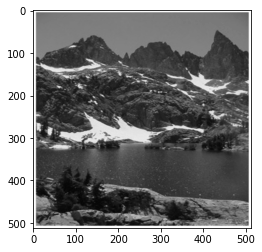

In [29]:
# load image
lakeside = cv2.imread(IMG_PATH+'lakeside.jpg')
lakeside = cv2.cvtColor(lakeside,cv2.COLOR_BGR2GRAY)
lakeside = cv2.resize(lakeside,[512,512])
plt.imshow(lakeside,cmap="gray")

In [30]:
def LowPass(img,D):
    filter = np.zeros(img.shape)
    
    X_Axis = np.arange(0, img.shape[0])
    Y_Axis = np.arange(0, img.shape[1])
    mid_row = img.shape[0]/2
    mid_col = img.shape[1]/2
    mask = (X_Axis[np.newaxis,:]-mid_row)**2 + (Y_Axis[:,np.newaxis]-mid_col)**2 <= (D**2)
    filter[mask] = 1
    return filter

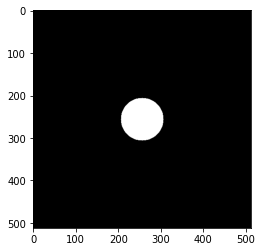

In [31]:
L1 = LowPass(lakeside,30)
L2 = LowPass(lakeside,15)
L3 = LowPass(lakeside,50)
# plt.imshow(L1,cmap="gray")
plt.imshow(L3,cmap="gray")

In [32]:
# converting to freq domain
lakeside_freq = np.fft.fftshift(twoD_FFT(lakeside))

In [33]:
# Applying Filters

# D = 30
lakeside_freq_30 = lakeside_freq * L1
# D = 15
lakeside_freq_15 = lakeside_freq * L2
# # D = 50
lakeside_freq_50 = lakeside_freq * L3
# plt.imshow(abs(lakeside_freq_30),cmap="gray")

In [34]:
# Shifting back
lakeside_new_30 = np.fft.ifftshift(lakeside_freq_30)
lakeside_new_15 = np.fft.ifftshift(lakeside_freq_15)
lakeside_new_50 = np.fft.ifftshift(lakeside_freq_50)

# Applying IFFT

lakeside_30 = abs(twoD_IFFT(lakeside_new_30))
lakeside_15 = abs(twoD_IFFT(lakeside_new_15))
lakeside_50 = abs(twoD_IFFT(lakeside_new_50))

# plt.imshow(lakeside_30,cmap="gray")

Text(0.5, 1.0, 'D = 50')

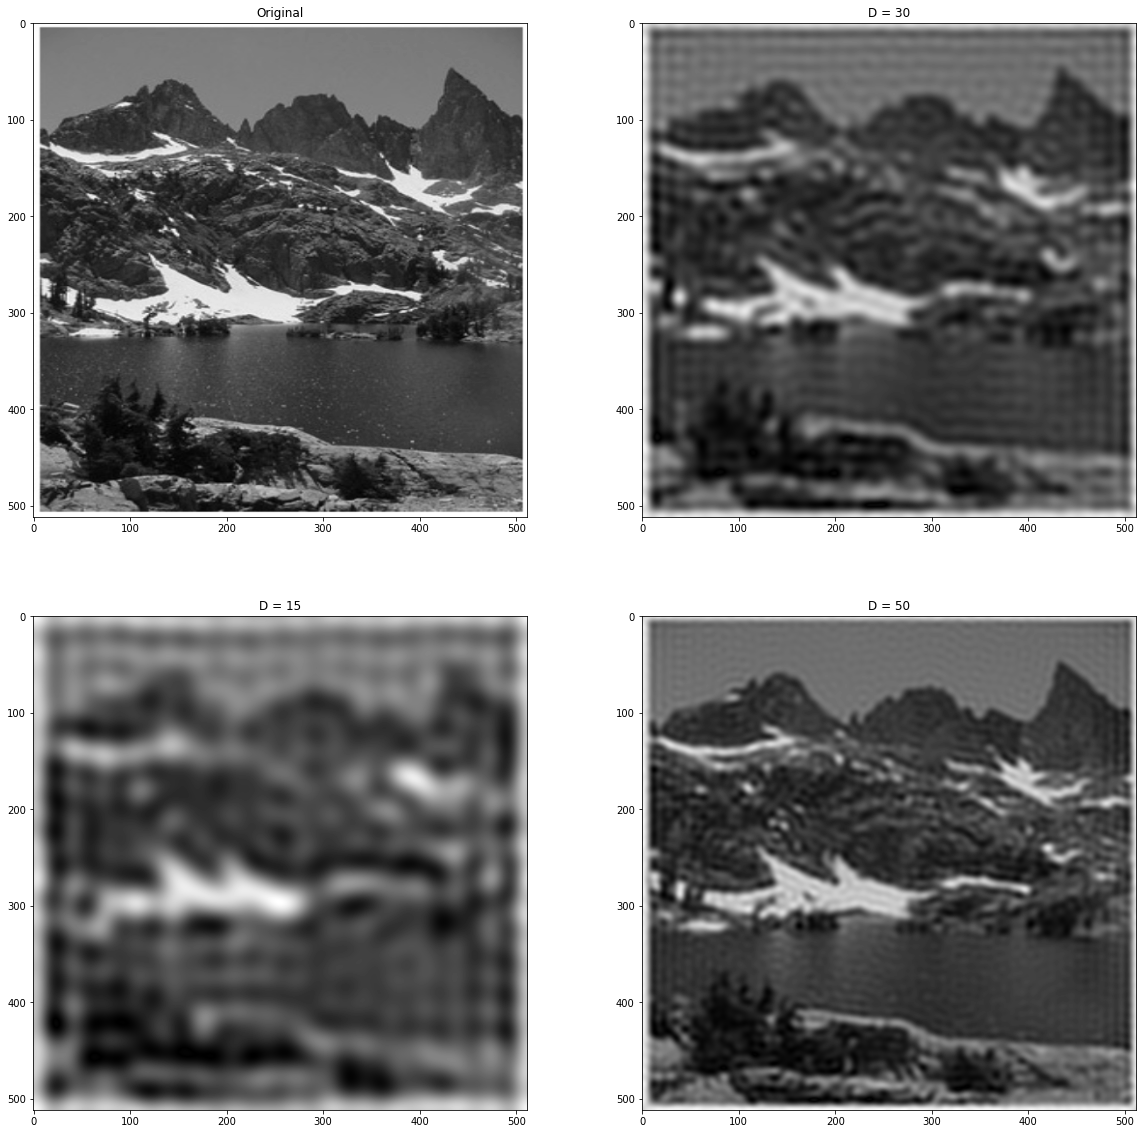

In [35]:
# Plotting

fig = plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(lakeside,cmap="gray")
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(lakeside_30,cmap="gray")
plt.title("D = 30")
plt.subplot(2,2,3)
plt.imshow(lakeside_15,cmap="gray")
plt.title("D = 15")
plt.subplot(2,2,4)
plt.imshow(lakeside_50,cmap="gray")
plt.title("D = 50")

As we increase the radius of the filter, the frequency component removed reduces and the image looks more like the original image. <br>
The circles seen are due to the sharp cutoff of the ideal LPF. This is also known as the ringing effect.

## 5.2

In [36]:
def GaussianLPF(img,D0):
    row,col = img.shape
    filter = np.zeros(img.shape)
    D = np.zeros(img.shape)
    mid_row = img.shape[0]/2
    mid_col = img.shape[1]/2
    for u in range(row):
        for v in range(col):
            D[u][v] = np.sqrt((u-mid_row)**2 + (v-mid_col)**2)
            filter[u][v] = np.exp(-1*(D[u][v]**2)/(2*(D0**2)))
    return filter

In [37]:
H1 = GaussianLPF(lakeside,30)
H2 = GaussianLPF(lakeside,15)
H3 = GaussianLPF(lakeside,50)
# plt.imshow(H2,cmap="gray")

In [38]:
# converting to freq domain
lakeside_freq = np.fft.fftshift(twoD_FFT(lakeside))

In [39]:
# Applying Filters

# D = 30
lakeside_freq_30 = lakeside_freq * H1
# D = 15
lakeside_freq_15 = lakeside_freq * H2
# # D = 50
lakeside_freq_50 = lakeside_freq * H3
# plt.imshow(abs(lakeside_freq_30),cmap="gray")

In [40]:
# Shifting back
lakeside_new_30 = np.fft.ifftshift(lakeside_freq_30)
lakeside_new_15 = np.fft.ifftshift(lakeside_freq_15)
lakeside_new_50 = np.fft.ifftshift(lakeside_freq_50)

# Applying IFFT

lakeside_30 = abs(twoD_IFFT(lakeside_new_30))
lakeside_15 = abs(twoD_IFFT(lakeside_new_15))
lakeside_50 = abs(twoD_IFFT(lakeside_new_50))

# plt.imshow(lakeside_30,cmap="gray")

Text(0.5, 1.0, 'D = 50')

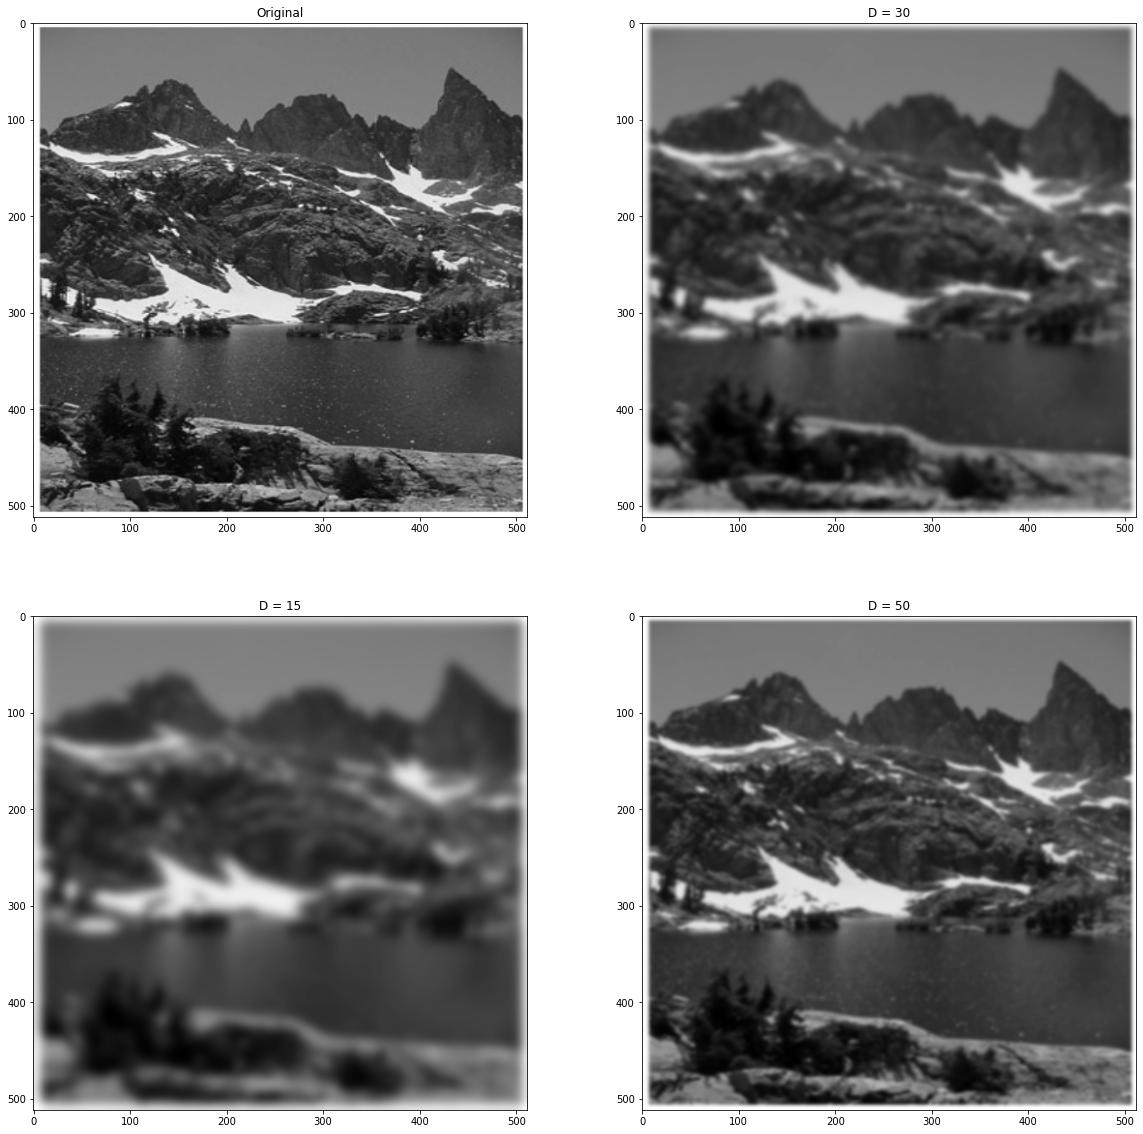

In [41]:
# Plotting

fig = plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(lakeside,cmap="gray")
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(lakeside_30,cmap="gray")
plt.title("D = 30")
plt.subplot(2,2,3)
plt.imshow(lakeside_15,cmap="gray")
plt.title("D = 15")
plt.subplot(2,2,4)
plt.imshow(lakeside_50,cmap="gray")
plt.title("D = 50")

As we increase the radius of the filter, the frequency component removed reduces and the image looks more like the original image. <br>
The ringing effect does not take place here as the gaussian filter has a gradual cutoff.

## 5.3
### Differences observed between Ideal LPF and Gaussian LPF
Ideal lowpass filtering produces ringing effect due to sharp cutoff.<br>
Gaussian lowpass filtering does not produce ringing effect.<br>

Gaussian filtering produces a much more smoother image than lowpass filtering.<br>

Gaussian Lowpass filtering takes a longer time than Ideal Lowpass filtering

# Answer 6

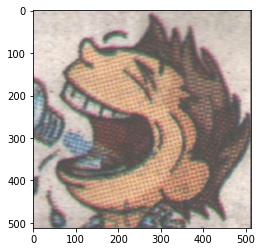

In [42]:
# load image
cart = cv2.imread(IMG_PATH+'cart.jpg')
cart = cv2.cvtColor(cart,cv2.COLOR_BGR2RGB)
cart = cv2.resize(cart,[512,512])
plt.imshow(cart)

In [43]:
def cartTransform(cart,val):
    cart_r,cart_g,cart_b = cv2.split(cart)

    # Applying FFT
    cart_r_freq = np.fft.fftshift(twoD_FFT(cart_r))
    cart_g_freq = np.fft.fftshift(twoD_FFT(cart_g))
    cart_b_freq = np.fft.fftshift(twoD_FFT(cart_b))

    # Applying Gaussian LPF
    H = GaussianLPF(cart_r,val)

    # Applying Filter

    # # D = val
    cart_r_freq_val = cart_r_freq * H
    cart_g_freq_val = cart_g_freq * H
    cart_b_freq_val = cart_b_freq * H

    # Shifting back
    cart_r_new_val = np.fft.ifftshift(cart_r_freq_val)
    cart_g_new_val = np.fft.ifftshift(cart_g_freq_val)
    cart_b_new_val = np.fft.ifftshift(cart_b_freq_val)

    # Applying IFFT
    cart_r_val = abs(twoD_IFFT(cart_r_new_val))
    cart_g_val = abs(twoD_IFFT(cart_g_new_val))
    cart_b_val = abs(twoD_IFFT(cart_b_new_val))

    # interpolating to values between 0-255
    r_val = np.rint(np.interp(cart_r_val, (cart_r_val.min(), cart_r_val.max()), (0, 255)))
    g_val = np.rint(np.interp(cart_g_val, (cart_g_val.min(), cart_g_val.max()), (0, 255)))
    b_val = np.rint(np.interp(cart_b_val, (cart_b_val.min(), cart_b_val.max()), (0, 255)))

    # Merging r,g,b
    cart_val = cv2.merge([r_val,g_val,b_val])
    cart_val = cart_val.astype(np.uint8)

    (r,g,b) = cv2.split(cart_val)
    # Apply bilateral filter
    r_new = bilateral_Filter(r,7,15,100)
    g_new = bilateral_Filter(g,7,15,100)
    b_new = bilateral_Filter(b,7,15,100)
    original = cv2.merge([r_new,g_new,b_new])

    return original

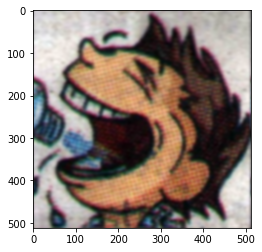

In [44]:
originalCart = cartTransform(cart,40)
plt.imshow(originalCart)